In [6]:
import cv2
import os
import numpy as np

In [8]:
blank_img=cv2.imread(r'C:\Users\17\Downloads\cs1\gtFine\default\frame_000000_gtFine_instanceIds.png')
blank_img2=cv2.imread(r'C:\Users\17\Downloads\cs1\gtFine\default\frame_000000_gtFine_labelIds.png')

In [12]:
np.unique(blank_img)

array([ 0,  3,  7, 11], dtype=uint8)

In [11]:
blank_img.shape

(720, 1280, 3)

In [48]:
im2=cv2.imread(r'C:\Users\17\Downloads\sm\SegmentationClass\frame_000000.png',0)

In [47]:
np.unique(im2)

array([0, 1, 2, 3], dtype=uint8)

In [14]:
import matplotlib.pyplot as plt

In [49]:
im2[im2==3]=245

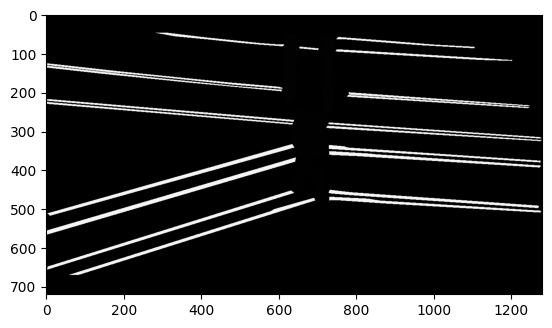

In [33]:
plt.imshow(im2,cmap='gray')

In [50]:
_,th=cv2.threshold(im2,200,255,cv2.THRESH_BINARY)

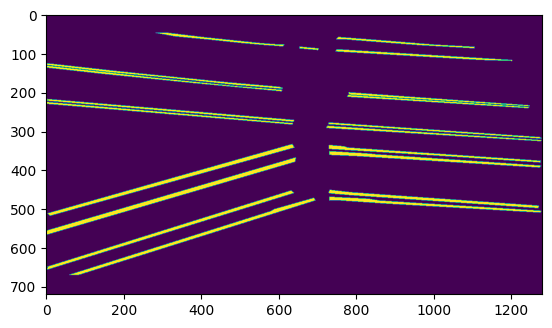

In [51]:
plt.imshow(th)

In [53]:
 contours, hierarchy=cv2.findContours(th,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [56]:
contours[0].shape

(780, 1, 2)

In [192]:
def segment_parce(filename):
    im2=cv2.imread(filename)
    seg_lst=[]
    gray=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
    classes=np.unique(im2)

    colors=[(0,0,0),(255,0,0),(0,255,0),(0,0,255)]
    img1=np.zeros(im2.shape)
    for cl in classes:
        im_tmp=gray.copy()
        im_tmp[im_tmp==cl]=255
        _,th=cv2.threshold(im_tmp,200,255,cv2.THRESH_BINARY)
        contours, hierarchy=cv2.findContours(th,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for c in contours:
            approximations = cv2.approxPolyDP(c, 0.7, True)
            seg_lst.append({'class':cl,
                            'polyline':approximations.reshape(approximations.shape[0]*approximations.shape[2],).tolist(),
                            'area':cv2.contourArea(approximations),
                            'bbox':list((approximations[:,:,0].min(),approximations[:,:,1].min(), \
                                        approximations[:,:,0].max(),approximations[:,:,1].max()))})
            #cv2.drawContours(img1, [approximations], 0, colors[cl], 1)
    return seg_lst
    

In [142]:
list((approximations[:,:,0].min(),approximations[:,:,1].min(), \
    approximations[:,:,0].max(),approximations[:,:,1].max()))

[283, 48, 614, 82]

In [144]:
a=segment_parce(r'dn_seg\content\dn_seg\frame_000000.png')

In [145]:
len(a)

37

In [128]:
im2=cv2.imread(r'dn_seg\content\dn_seg\frame_000000.png')

In [129]:
im2.shape

(720, 1280, 3)

In [102]:
np.unique(im_tmp)

array([  0,   2,   3, 255], dtype=uint8)

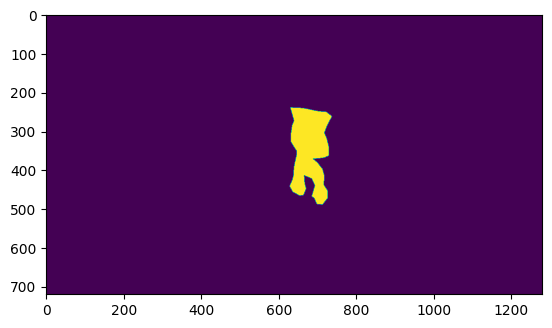

In [112]:
plt.imshow(th)

In [138]:
approximations.shape

(14, 1, 2)

In [137]:
approximations.reshape(28).tolist()

[283,
 48,
 334,
 57,
 418,
 64,
 526,
 76,
 601,
 81,
 602,
 82,
 611,
 82,
 614,
 78,
 591,
 78,
 590,
 77,
 531,
 73,
 483,
 67,
 416,
 61,
 315,
 48]

In [136]:
approximations

array([[[283,  48]],

       [[334,  57]],

       [[418,  64]],

       [[526,  76]],

       [[601,  81]],

       [[602,  82]],

       [[611,  82]],

       [[614,  78]],

       [[591,  78]],

       [[590,  77]],

       [[531,  73]],

       [[483,  67]],

       [[416,  61]],

       [[315,  48]]], dtype=int32)

In [93]:
img1.shape

(720, 1280, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


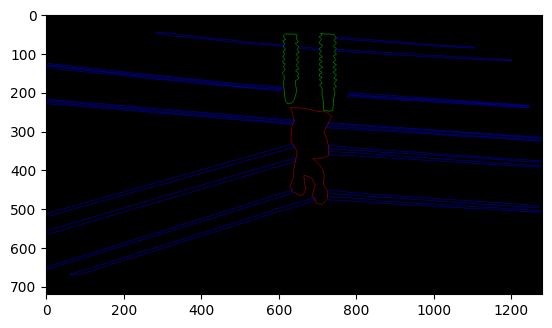

In [115]:
plt.imshow(img1)

In [178]:
import json 

with open('job_39644-2022_11_27_11_40_01-coco 1.0/annotations/instances_default.json','r') as f:
    data=json.load(f)
print(data.keys())

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])


In [198]:
ex_file=os.listdir('dn_seg\content\dn_seg')
ann_lst=[]
ann_idx=0
e=False
for img in data['images']:
    if img['file_name'].split('/')[-1].lower() in ex_file:
        print(img['file_name'])
        seg_lst=segment_parce('dn_seg/content/dn_seg/' + img['file_name'].split('/')[-1])
        for segment in seg_lst:
            if segment['class']!=0:
                if len(segment['polyline'])>=6:
                    ann_lst.append({ 'id':ann_idx,
                                    'image_id': img['id'],
                                    'category_id': segment['class'],
                                    'segmentation': [segment['polyline']],
                                    'area': segment['area'],
                                    'bbox': segment['bbox'],
                                    'iscrowd': 0,
                                    'attributes': {'occluded': False}
                                    })
                    if len(segment['polyline'])<6:
                        e=True
                        break
                    ann_idx+=1
        if e:
            break

JPEGImages/frame_000000.PNG
JPEGImages/frame_000001.PNG
JPEGImages/frame_000002.PNG
JPEGImages/frame_000003.PNG
JPEGImages/frame_000004.PNG
JPEGImages/frame_000005.PNG
JPEGImages/frame_000006.PNG
JPEGImages/frame_000007.PNG
JPEGImages/frame_000008.PNG
JPEGImages/frame_000009.PNG
JPEGImages/frame_000010.PNG
JPEGImages/frame_000011.PNG
JPEGImages/frame_000012.PNG
JPEGImages/frame_000013.PNG
JPEGImages/frame_000014.PNG
JPEGImages/frame_000015.PNG
JPEGImages/frame_000016.PNG
JPEGImages/frame_000017.PNG
JPEGImages/frame_000018.PNG
JPEGImages/frame_000019.PNG
JPEGImages/frame_000020.PNG
JPEGImages/frame_000021.PNG
JPEGImages/frame_000022.PNG
JPEGImages/frame_000023.PNG
JPEGImages/frame_000024.PNG
JPEGImages/frame_000025.PNG
JPEGImages/frame_000026.PNG
JPEGImages/frame_000027.PNG
JPEGImages/frame_000028.PNG
JPEGImages/frame_000029.PNG
JPEGImages/frame_000030.PNG
JPEGImages/frame_000031.PNG
JPEGImages/frame_000032.PNG
JPEGImages/frame_000033.PNG
JPEGImages/frame_000034.PNG
JPEGImages/frame_000

In [199]:
ann_idx

5624

In [195]:
segment

{'class': 3,
 'polyline': [663, 190, 666, 190],
 'area': 0.0,
 'bbox': [663, 190, 666, 190]}

In [185]:
data['images'][-1]

{'id': 351,
 'width': 1280,
 'height': 720,
 'file_name': 'SegmentationClass/frame_000000.png',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0}

In [181]:
img

{'id': 351,
 'width': 1280,
 'height': 720,
 'file_name': 'SegmentationClass/frame_000000.png',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0}

In [155]:
img['file_name'].lower() 

'frame_000349.png'

In [188]:
data['annotations']=ann_lst.copy()

In [176]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(NpEncoder, self).default(obj)

In [189]:
with open('coco1/annotations/instances_default2.json','w') as f:
    json.dump(data,f,cls=NpEncoder)

In [171]:
ann_lst[0]

{'id': 0,
 'image_id': 1,
 'category_id': 1,
 'segmentation': [[631,
   240,
   640,
   272,
   640,
   275,
   635,
   285,
   632,
   305,
   632,
   328,
   647,
   351,
   647,
   362,
   640,
   391,
   638,
   419,
   629,
   443,
   637,
   457,
   654,
   466,
   663,
   465,
   670,
   450,
   670,
   446,
   667,
   438,
   665,
   415,
   667,
   414,
   684,
   421,
   687,
   424,
   694,
   440,
   686,
   468,
   693,
   474,
   698,
   487,
   713,
   489,
   726,
   473,
   726,
   454,
   716,
   439,
   717,
   413,
   713,
   398,
   702,
   384,
   688,
   372,
   715,
   369,
   729,
   363,
   729,
   340,
   724,
   320,
   717,
   305,
   723,
   289,
   737,
   263,
   724,
   252,
   721,
   251,
   701,
   250,
   666,
   242]],
 'area': 17829.0,
 'bbox': [629, 240, 737, 489],
 'iscrowd': 0,
 'attributes': {'occluded': False}}

In [158]:
len(ann_lst)

9166

In [122]:
img

{'id': 1,
 'width': 1280,
 'height': 720,
 'file_name': 'frame_000000.PNG',
 'license': 0,
 'flickr_url': '',
 'coco_url': '',
 'date_captured': 0}

In [121]:
data['annotations'][0]

{'id': 1,
 'image_id': 1,
 'category_id': 3,
 'segmentation': [[707.35,
   49.92,
   713.42,
   52.96,
   703.93,
   58.27,
   710.77,
   64.73,
   705.07,
   73.08,
   705.45,
   76.49,
   713.42,
   81.05,
   711.53,
   84.09,
   705.07,
   88.26,
   704.31,
   91.3,
   711.15,
   95.1,
   705.07,
   100.79,
   706.97,
   105.72,
   713.04,
   109.52,
   707.73,
   112.56,
   704.69,
   114.08,
   705.07,
   118.25,
   712.28,
   121.67,
   707.73,
   125.09,
   705.83,
   126.98,
   706.21,
   133.06,
   713.8,
   136.47,
   703.93,
   141.79,
   705.45,
   145.96,
   713.04,
   150.14,
   705.45,
   153.94,
   705.45,
   159.63,
   712.66,
   163.43,
   705.45,
   168.36,
   706.97,
   172.92,
   711.91,
   177.47,
   706.97,
   180.51,
   705.45,
   183.17,
   708.11,
   186.58,
   711.53,
   190.0,
   712.1,
   207.69,
   715.93,
   230.13,
   715.93,
   242.16,
   716.46,
   248.69,
   734.49,
   250.36,
   740.53,
   246.53,
   743.26,
   217.56,
   746.0,
   206.06,
   746.0,


In [118]:
data['annotations']

[{'id': 1,
  'image_id': 1,
  'category_id': 3,
  'segmentation': [[707.35,
    49.92,
    713.42,
    52.96,
    703.93,
    58.27,
    710.77,
    64.73,
    705.07,
    73.08,
    705.45,
    76.49,
    713.42,
    81.05,
    711.53,
    84.09,
    705.07,
    88.26,
    704.31,
    91.3,
    711.15,
    95.1,
    705.07,
    100.79,
    706.97,
    105.72,
    713.04,
    109.52,
    707.73,
    112.56,
    704.69,
    114.08,
    705.07,
    118.25,
    712.28,
    121.67,
    707.73,
    125.09,
    705.83,
    126.98,
    706.21,
    133.06,
    713.8,
    136.47,
    703.93,
    141.79,
    705.45,
    145.96,
    713.04,
    150.14,
    705.45,
    153.94,
    705.45,
    159.63,
    712.66,
    163.43,
    705.45,
    168.36,
    706.97,
    172.92,
    711.91,
    177.47,
    706.97,
    180.51,
    705.45,
    183.17,
    708.11,
    186.58,
    711.53,
    190.0,
    712.1,
    207.69,
    715.93,
    230.13,
    715.93,
    242.16,
    716.46,
    248.69,
    734.49,
    